In [1]:
!ls

classification_model.py  resnet50_feature_extractor.py	task_b.py
features		 task_a.ipynb			visualization.ipynb
models			 task_a.py


In [2]:
!ls features

test_features_resnet50.pkl  train_features_resnet50.pkl


In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap

In [4]:
def get_embeddings(file,):
    
    with open(file, 'rb') as f:
        features = pickle.load(f)

    features = [np.squeeze(fe) for fe in features]
    print (len(features)) # batches

    embed = []
    for fe in features:
        for sample in fe:
            #print (sample.shape)
            if np.squeeze(sample).shape == (2048,):
                embed.append(np.squeeze(sample))

    embed = np.array(embed)
    #embed.shape
    return embed

In [5]:
test_embd   = get_embeddings('features/test_features_resnet50.pkl')
test_target = np.ones(test_embd.shape[0])

101


In [6]:
train_embd   = get_embeddings('features/train_features_resnet50.pkl')
train_target = np.ones(train_embd.shape[0])

236


In [7]:
test_embd.shape, test_target.shape, train_embd.shape, train_target.shape

((807, 2048), (807,), (1880, 2048), (1880,))

In [8]:
## UMAP

In [9]:
train_umap = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(train_embd)

In [10]:
train_umap.shape

(1880, 2)

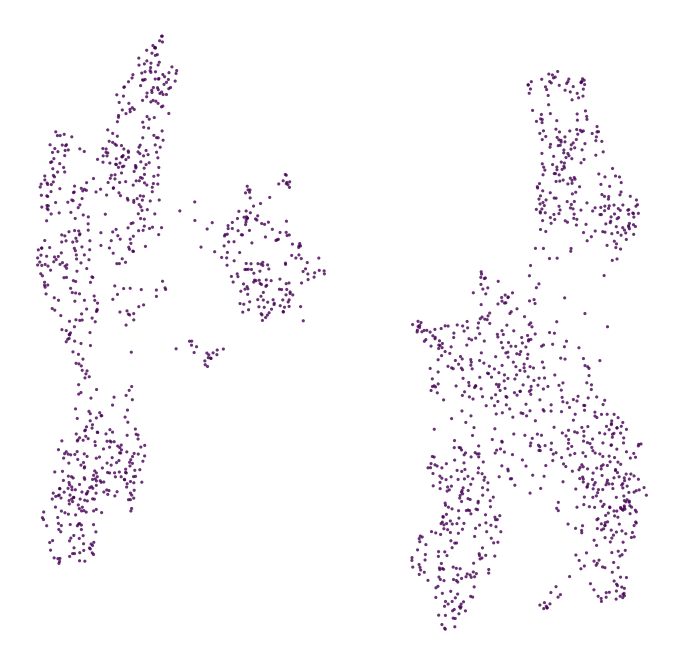

In [11]:
plt.figure(figsize=(12,12))
plt.scatter(train_umap[:, 0], train_umap[:, 1], 
            c=train_target, 
            edgecolor='none', 
            alpha=0.80, 
            s=10)
plt.axis('off');

In [12]:
## TSNE

In [13]:
from sklearn.manifold import TSNE # TSNE module

In [14]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
train_tsne = tsne.fit_transform(train_embd)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1880 samples in 0.003s...
[t-SNE] Computed neighbors for 1880 samples in 0.188s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1880
[t-SNE] Computed conditional probabilities for sample 1880 / 1880
[t-SNE] Mean sigma: 4.255467
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.003571
[t-SNE] KL divergence after 2000 iterations: 1.066933


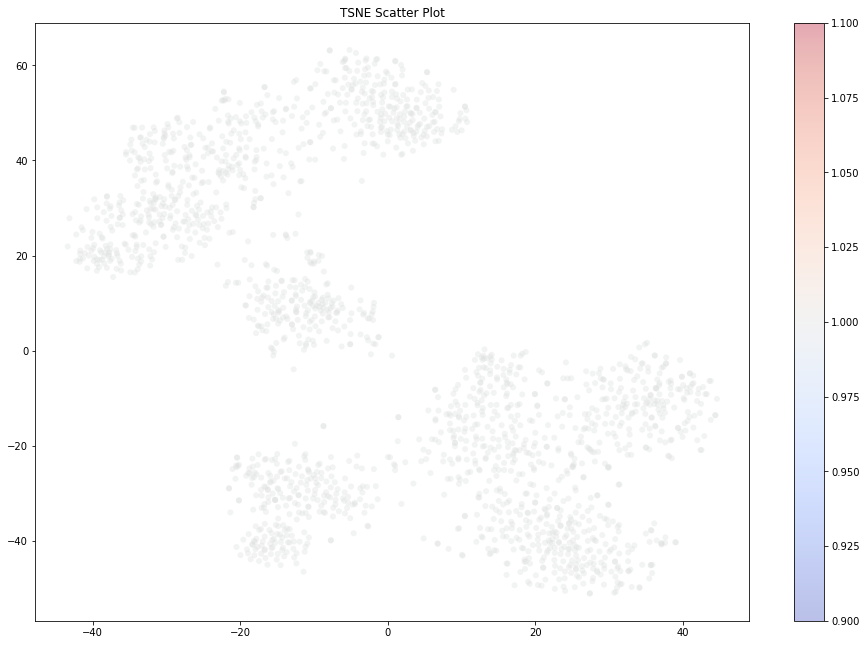

In [15]:
plt.figure(figsize = (16,11))
plt.scatter(train_tsne[:,0],train_tsne[:,1],  c = train_target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()